In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
register_matplotlib_converters()

In [2]:
# Importing the data
df_ice_cream = pd.read_csv("ice_cream.csv")
df_ice_cream.head()

,DATE,IPN31152N
0,1972-01-01,59.9622
1,1972-02-01,67.0605
2,1972-03-01,74.2350
3,1972-04-01,78.1120
4,1972-05-01,84.7636


In [3]:
# rename column in more understable way
df_ice_cream.rename(columns={'DATE':'date', 'IPN31152N':'production'},
                    inplace = True)

In [5]:
df_ice_cream.head()

,date,production
0,1972-01-01,59.9622
1,1972-02-01,67.0605
2,1972-03-01,74.2350
3,1972-04-01,78.1120
4,1972-05-01,84.7636


In [6]:
# Convert the date column to date time format from string
df_ice_cream['date'] = pd.to_datetime(df_ice_cream.date)
df_ice_cream.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577 entries, 0 to 576
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        577 non-null    datetime64[ns]
 1   production  577 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 9.1 KB


In [7]:
# Set date as index
df_ice_cream.set_index('date', inplace=True)
df_ice_cream.head()

,production
date,
1972-01-01,59.9622
1972-02-01,67.0605
1972-03-01,74.2350
1972-04-01,78.1120
1972-05-01,84.7636


In [8]:
# Get the small set of data from the large set like from 2010 onwards
start_date = pd.to_datetime('2010-01-01')
df_ice_cream = df_ice_cream[start_date:]

In [10]:
df_ice_cream.head(n = 13)

,production
date,
2010-01-01,91.2895
2010-02-01,110.4994
2010-03-01,127.0971
2010-04-01,132.6468
2010-05-01,134.5576
2010-06-01,143.9519
2010-07-01,128.8566
2010-08-01,125.5563
2010-09-01,116.0686


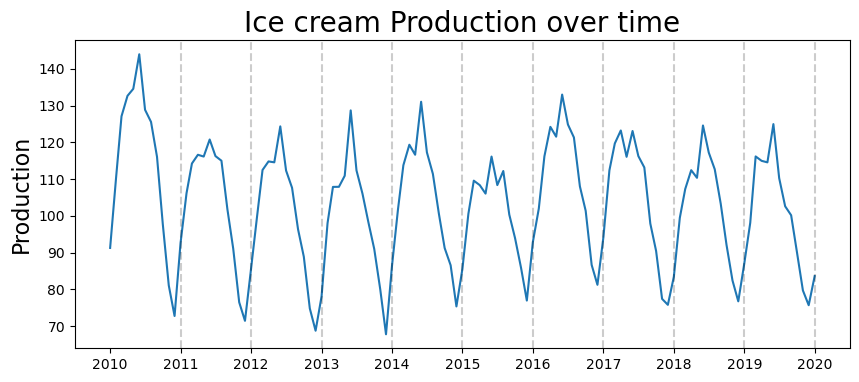

In [13]:
# Plot for the data using matplotlib
plt.figure(figsize=(10,4))
plt.plot(df_ice_cream.production)
plt.title("Ice cream Production over time", fontsize=20)
plt.ylabel("Production", fontsize = 16)

for year in range(2011, 2021):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color = 'k',
                linestyle = '--', alpha=0.2)
    


plt.axvline(pd.to_datetime(str(year)+'-01-01'), color = 'k', linestyle = '--', alpha=0.2): Within each iteration of the loop, this line of code creates a vertical line at the beginning of the current year. Here's what each argument means:

pd.to_datetime(str(year)+'-01-01'): This converts the year (e.g., 2011) into a Pandas datetime object representing January 1st of that year. The to_datetime() function converts the input to a datetime object, and '01-01' specifies the first day of January.

color='k': This specifies the color of the line. Here, 'k' stands for black.

linestyle='--': This specifies the style of the line. Here, '--' indicates a dashed line.

alpha=0.2: This sets the transparency level of the line to 0.2 (or 20%). This makes the lines partially transparent, allowing other elements of the plot to be partially visible behind the lines.

## ACF: Auto Correlation Function
Autocorrelation measures the relationship between a variable's current value and its past values at different lags.

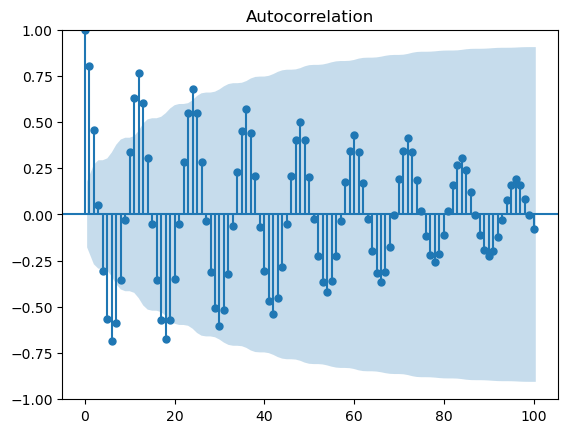

In [14]:
acf_plot = plot_acf(df_ice_cream.production, lags = 100)

## PACF: Partial Auto Correlation Function

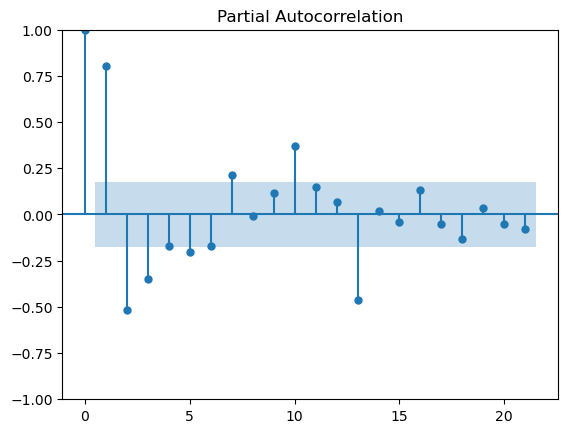

In [15]:
pacf_plot = plot_pacf(df_ice_cream.production)